## Import Libraries:

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


 ##  Load datasets


In [98]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')


In [99]:
print(customers_df.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [100]:
print(products_df.head())

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [101]:
# Preview the datasets
print(transactions_df.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [102]:
# Check for missing values
print(customers_df.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [103]:
# Check for missing values
print(products_df.isnull().sum())


ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [104]:
# Check for missing values
print(transactions_df.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [105]:
# Convert relevant columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [106]:
# Step 5: Get basic summary statistics for each dataset
print("Summary statistics for customers dataset:")
print(customers_df.describe())  


Summary statistics for customers dataset:
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00


In [107]:
print("Summary statistics for products dataset:")
print(products_df.describe())  


Summary statistics for products dataset:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [108]:
print("Summary statistics for transactions dataset:")
print(transactions_df.describe())  


Summary statistics for transactions dataset:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


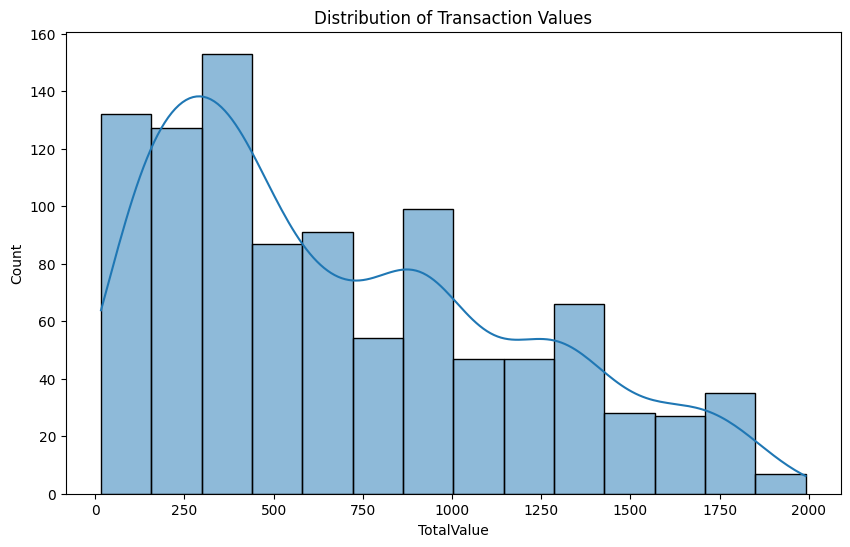

In [109]:
# Visualizing the distribution of transaction values
plt.figure(figsize=(10, 6))
sns.histplot(transactions_df['TotalValue'], kde=True)
plt.title('Distribution of Transaction Values')
plt.show()

In [ ]:
1-The histogram shows that the majority of transactions have relatively low total values.
2-This suggests that smaller, more frequent purchases are common among customers.

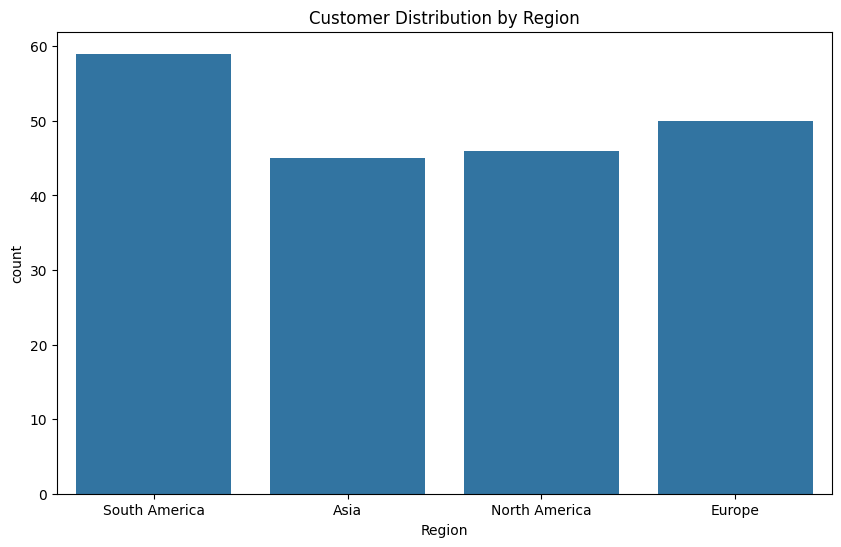

In [110]:
#Customer Distribution by Region
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_df, x='Region')
plt.title('Customer Distribution by Region')
plt.show()


The visualization shows that customers are unevenly distributed across different regions.

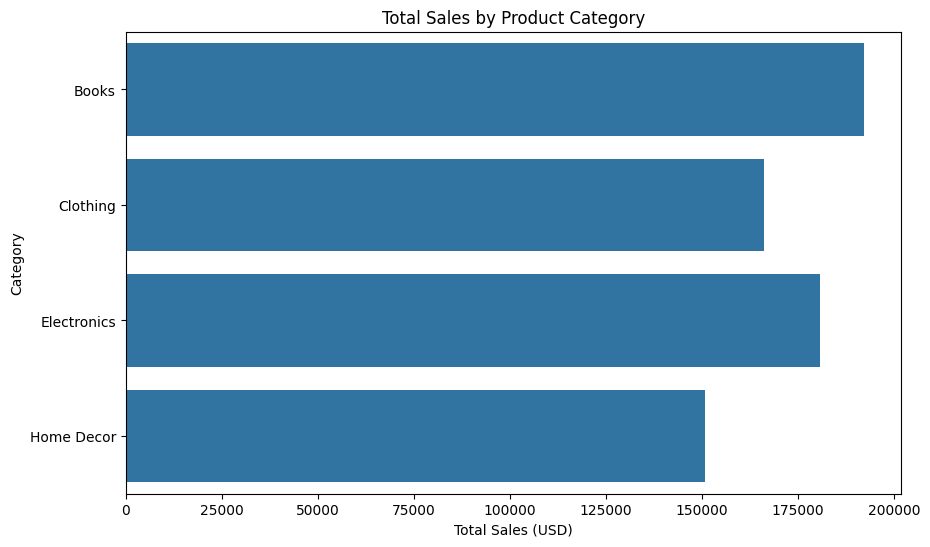

In [111]:
# Product category sales
plt.figure(figsize=(10, 6))
category_sales = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum().reset_index()
sns.barplot(data=category_sales, x='TotalValue', y='Category')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Category')
plt.show()


The bar chart reveals that a 4 product categories contribute the most to total sales.

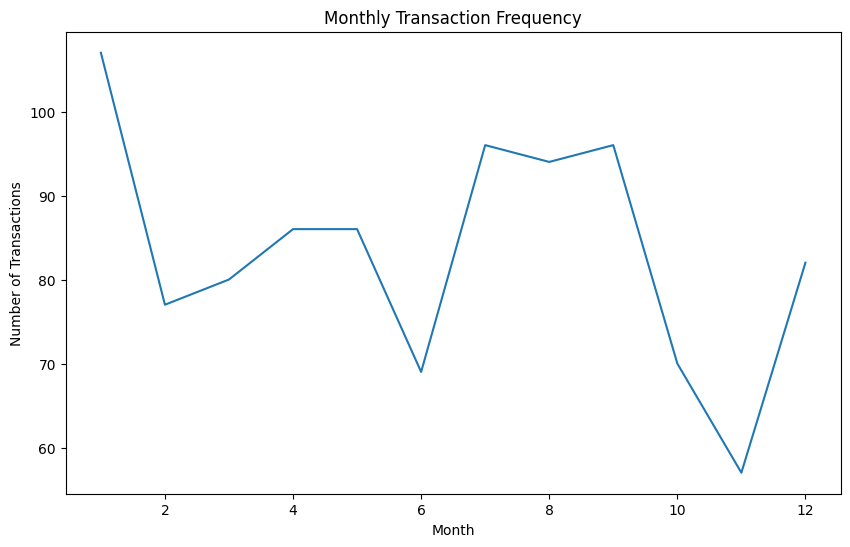

In [112]:
# Analyzing the frequency of transactions
transactions_df['Month'] = transactions_df['TransactionDate'].dt.month
monthly_transactions = transactions_df.groupby('Month').size()
monthly_transactions.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Transaction Frequency')
plt.ylabel('Number of Transactions')
plt.show()


In [ ]:
The line plot reveals clear peaks in transaction frequency during specific months.

In [113]:
# numeric columns for the correlation matrix
numeric_columns = transactions_df.select_dtypes(include=[np.number]).columns

In [114]:
# Compute correlation matrix for numeric columns
correlation_matrix = transactions_df[numeric_columns].corr() 

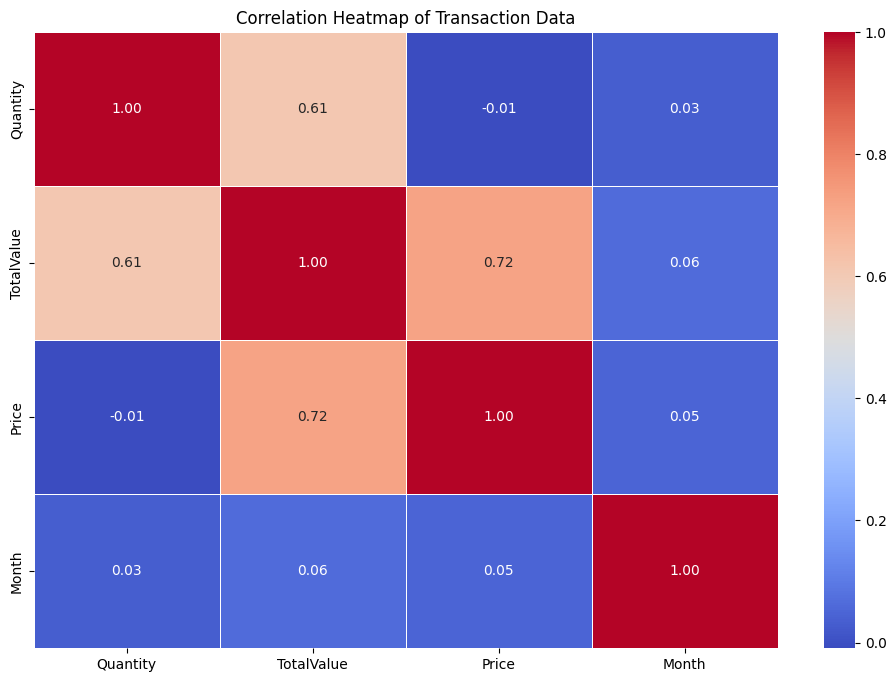

In [115]:
# a heatmap to visualize the correlation
plt.figure(figsize=(12, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) 
plt.title('Correlation Heatmap of Transaction Data')
plt.show()

1-The heatmap indicates a strong positive correlation between TotalValue and Quantity.
2-heatmap shows a weak correlation between Price and Quantity

In [116]:
# the top 10 most popular products based on quantity sold
popular_products = transactions_df.groupby('ProductID').agg({'Quantity': 'sum'}) \
                                  .sort_values('Quantity', ascending=False).head(10)  
popular_products = popular_products.merge(products_df[['ProductID', 'ProductName']], on='ProductID')  
print("Top 10 Most Popular Products based on Quantity Sold:")
print(popular_products[['ProductName', 'Quantity' ]])

Top 10 Most Popular Products based on Quantity Sold:
             ProductName  Quantity
0        SoundWave Jeans        46
1     SoundWave Cookbook        46
2     TechPro Headphones        45
3         ActiveWear Rug        43
4    HomeSense Desk Lamp        43
5  ActiveWear Smartphone        43
6       TechPro Cookbook        43
7        HomeSense Novel        39
8      ActiveWear Jacket        38
9    HomeSense Desk Lamp        38


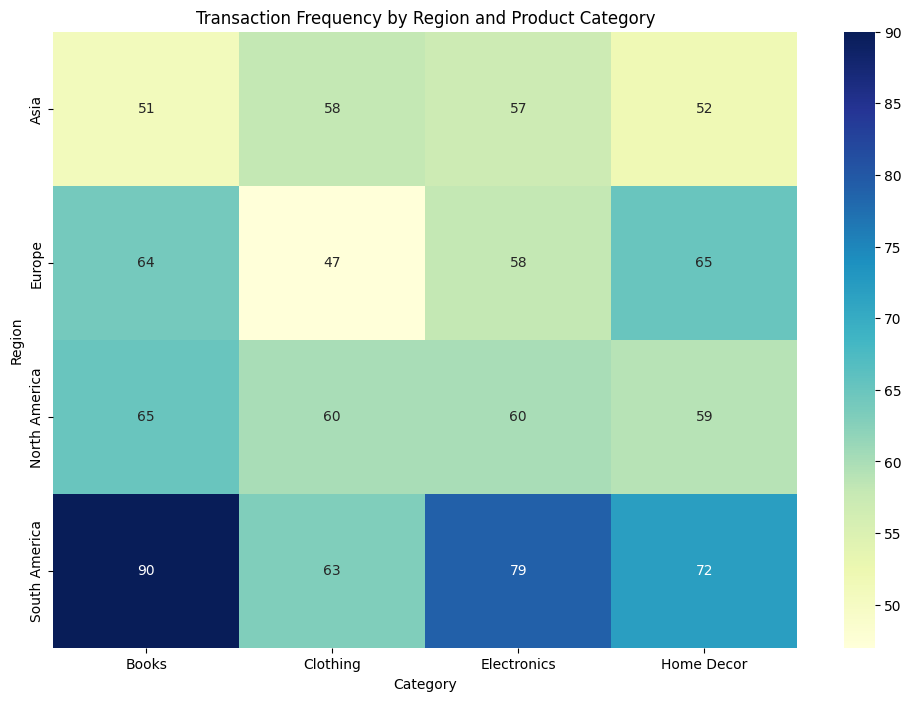

In [117]:
# Grouping transactions by region and category
region_category_freq = transactions_df.merge(customers_df[['CustomerID', 'Region']], on='CustomerID') \
                                       .merge(products_df[['ProductID', 'Category']], on='ProductID') \
                                       .groupby(['Region', 'Category']).size().unstack().fillna(0)

# Heatmap of transaction frequency by region and category
plt.figure(figsize=(12, 8))
sns.heatmap(region_category_freq, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Transaction Frequency by Region and Product Category')
plt.show()


1-The heatmap reveals that certain regions have a higher transaction frequency in specific product categories.

2-For example, if a region has a high frequency of transactions for electronics but low for clothing, it shows a regional preference.

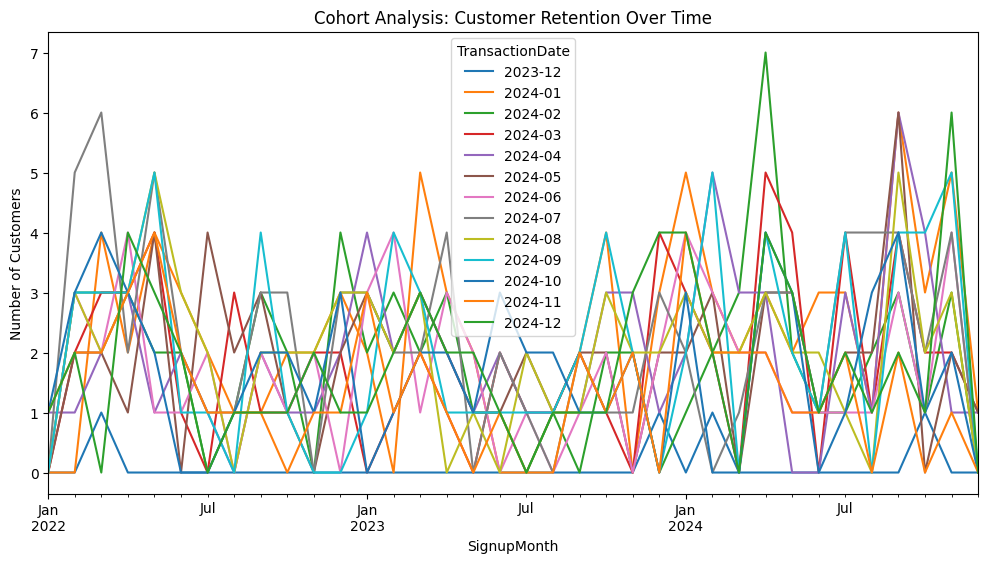

In [118]:
# cohort groups based on the month of signup
customers_df['SignupMonth'] = customers_df['SignupDate'].dt.to_period('M')

# Merge with transactions to assign customers to cohorts
transactions_df = transactions_df.merge(customers_df[['CustomerID', 'SignupMonth']], on='CustomerID')

# cohort (SignupMonth) and the month of transaction
cohort_data = transactions_df.groupby(['SignupMonth', transactions_df['TransactionDate'].dt.to_period('M')]) \
                             .agg({'CustomerID': 'nunique'}).unstack(fill_value=0)

cohort_data.columns = cohort_data.columns.droplevel()
cohort_data.plot(kind='line', figsize=(12, 6))
plt.title('Cohort Analysis: Customer Retention Over Time')
plt.ylabel('Number of Customers')
plt.show()


The cohort analysis describes how the customers' retention patterns change with respect to the month they signed up.
